## EE 461P: Data Science Principles  
### Homework 3 
### Total points: 80
### Due: Thursday, Mar 7, 2023, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. Laith Altarabishi - la26744
2. 

### Homework group No.: 

# Q1. - Stochastic Gradient Descent (25 pts)
1. (**5pts**) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model (assuming squared error as your loss function): 
$$ y = w_0 + w_1x_1 + w_2x_1^{2}x_2 + w_3e^{-x_1}+ w_4log(x_3) $$ 


2. (**20pts**) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1^{2}x_2 + w_3e^{-x_1}+ w_4log(x_3) $$   Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). 

  **a**) Use your new gradient descent regression to predict the data given in ```'samples.csv'```, for 15 epochs, using learning rates: ```[0, .0001, .001, .01, 0.1, 1, 10, 100]``` and regularization (ridge regression) parameters: ```[0,10,100]```. (**13pts**)

  **b**) Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the two best combinations of learning_rate and regularization for SGD. Here "best" means lowest MSE at the end of 15 epochs. (**5pts**)

  ```NOTE``` : In this setting there is no validation/test data, and stopping after a pre-determined number of epochs is an example of an "early stopping" approch to avoid overfitting.(This approach is not ideal, but is sometimes employed in the absence of a validation dataset).

  **c**) Also report the MSE at the end of 15 epochs that you obtained for these two "best" combinations. (**2pts**)


In [2]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-6
        self.coef = np.zeros(5) 
       
    def sgd(self, gradient):
        self.coef = self.coef - self.learning_rate*gradient 
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute squared error
                error = y[i] - self.linearPredict(X[i]) 
                error_sq = error**2
                # Compute gradients
                gradient = -2*X[i]*error + 2*self.regularization*self.coef
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
            
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 5))
        x[:,0] = 1
        x[:,1] = (X[:,0])
        x[:,2] = (X[:,0]**2)*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        x[:,4] = np.log(X[:,2])
        
        return x
        
    def linearPredict(self, X):  
        # compute dot product of self.coef and X
        product = self.coef.dot(X.T)
        return product
        
        

In [4]:
df = pd.read_csv("samples.csv",index_col=0)
X = np.array([df['x1'].values, df['x2'].values,df['x3'].values]).T
y = df['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

Learning rate:  0.0001 Regularization:  0 MSE:  0.20495219972008769
Learning rate:  0.0001 Regularization:  10 MSE:  3.118045695599173
Learning rate:  0.0001 Regularization:  100 MSE:  4.620547858148107
Learning rate:  0.001 Regularization:  0 MSE:  0.007709156790068086
Learning rate:  0.001 Regularization:  10 MSE:  3.12240867360661
Learning rate:  0.001 Regularization:  100 MSE:  4.591875899752883
Learning rate:  0.01 Regularization:  0 MSE:  0.0007860200422555938
Learning rate:  0.01 Regularization:  10 MSE:  3.000866289037016
Learning rate:  0.01 Regularization:  100 MSE:  inf
Learning rate:  0.1 Regularization:  0 MSE:  0.0004837943979026238


C:\Users\laith\AppData\Local\Temp\ipykernel_26636\2165471009.py:28: RuntimeWarning: overflow encountered in scalar power
  error_sq = error**2
C:\Users\laith\AppData\Local\Temp\ipykernel_26636\2165471009.py:37: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
C:\Users\laith\AppData\Local\Temp\ipykernel_26636\2165471009.py:30: RuntimeWarning: overflow encountered in add
  gradient = -2*X[i]*error + 2*self.regularization*self.coef
C:\Users\laith\AppData\Local\Temp\ipykernel_26636\2165471009.py:17: RuntimeWarning: invalid value encountered in subtract
  self.coef = self.coef - self.learning_rate*gradient
C:\Users\laith\AppData\Local\Temp\ipykernel_26636\2165471009.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matp

Learning rate:  0.1 Regularization:  10 MSE:  nan
Learning rate:  0.1 Regularization:  100 MSE:  nan
Learning rate:  1 Regularization:  0 MSE:  nan
Learning rate:  1 Regularization:  10 MSE:  nan
Learning rate:  1 Regularization:  100 MSE:  nan


C:\Users\laith\AppData\Local\Temp\ipykernel_26636\2165471009.py:17: RuntimeWarning: overflow encountered in multiply
  self.coef = self.coef - self.learning_rate*gradient


Learning rate:  10 Regularization:  0 MSE:  nan
Learning rate:  10 Regularization:  10 MSE:  nan
Learning rate:  10 Regularization:  100 MSE:  nan
Learning rate:  100 Regularization:  0 MSE:  nan
Learning rate:  100 Regularization:  10 MSE:  nan
Learning rate:  100 Regularization:  100 MSE:  nan


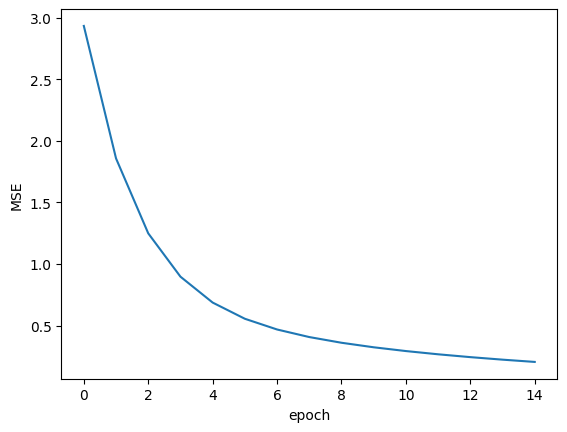

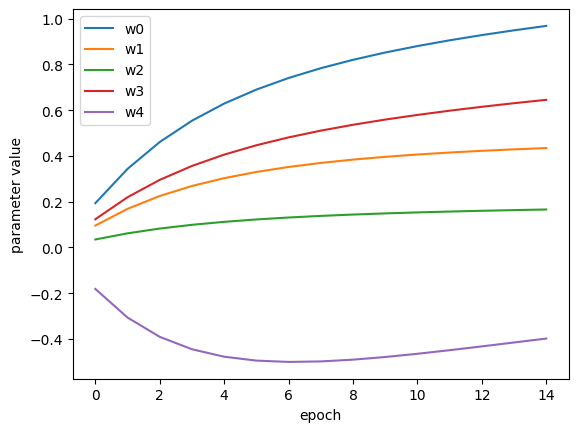

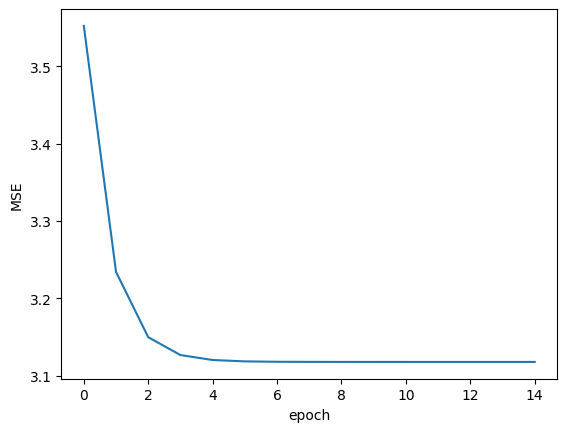

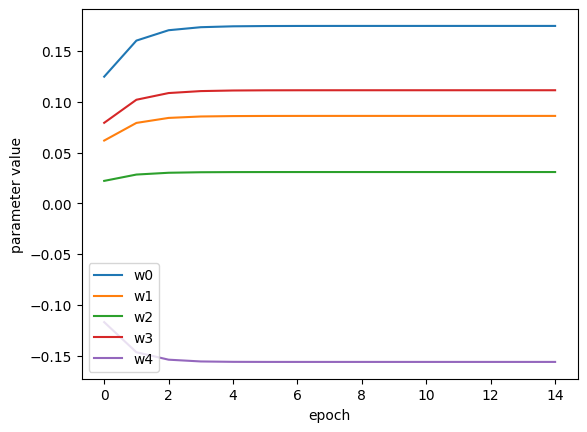

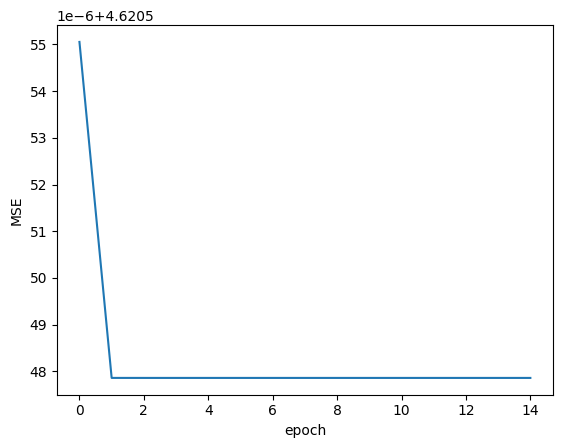

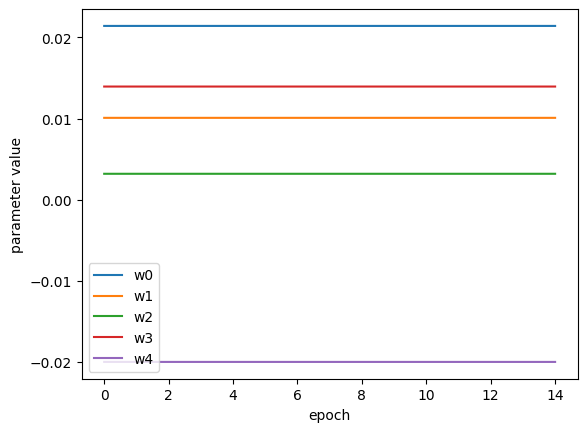

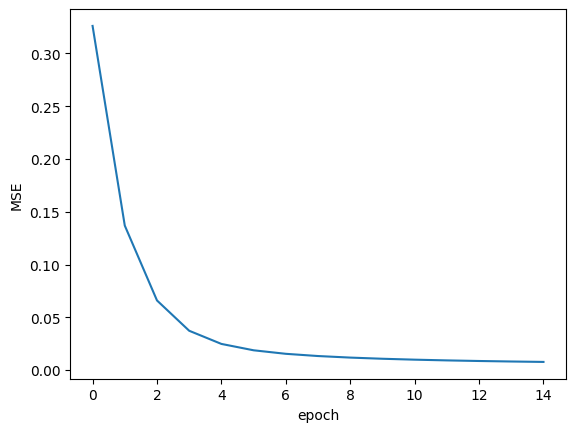

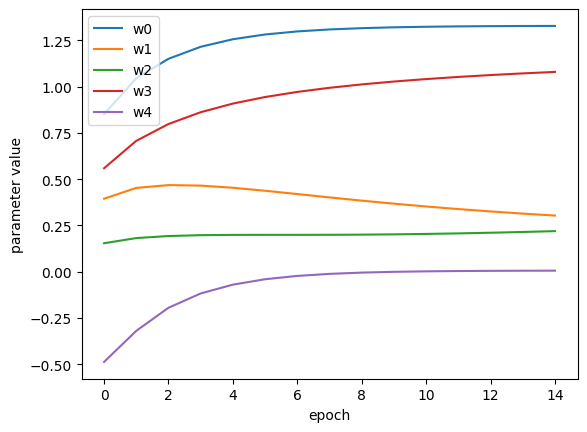

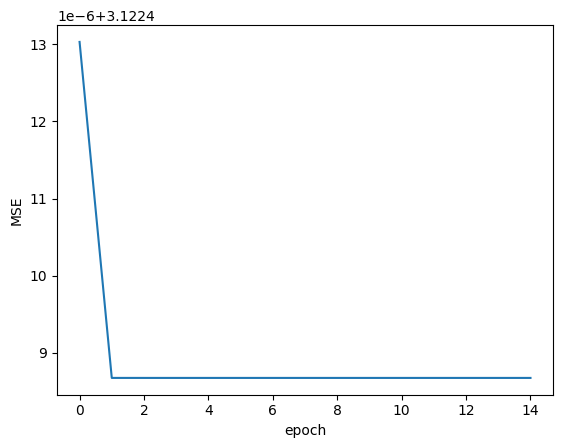

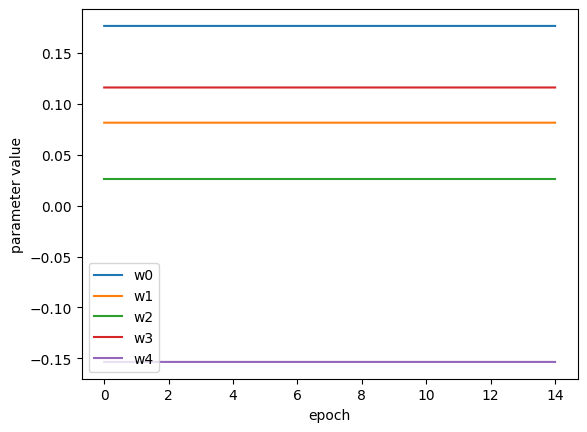

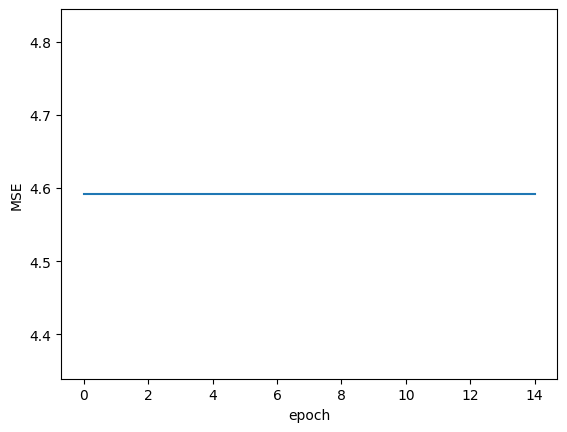

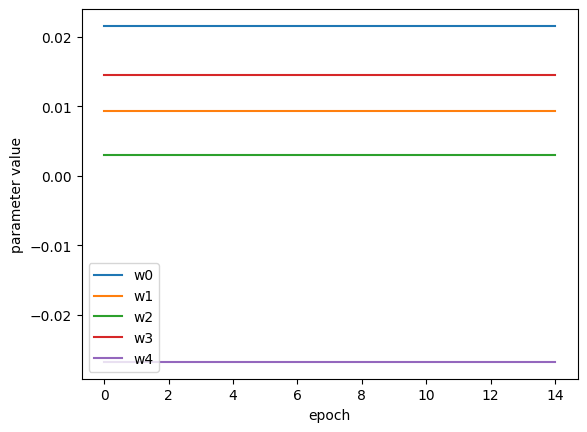

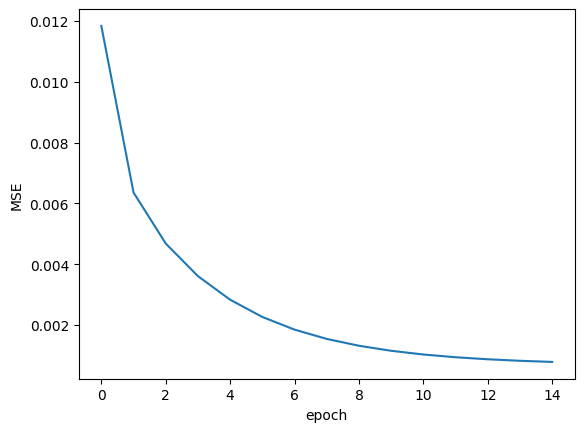

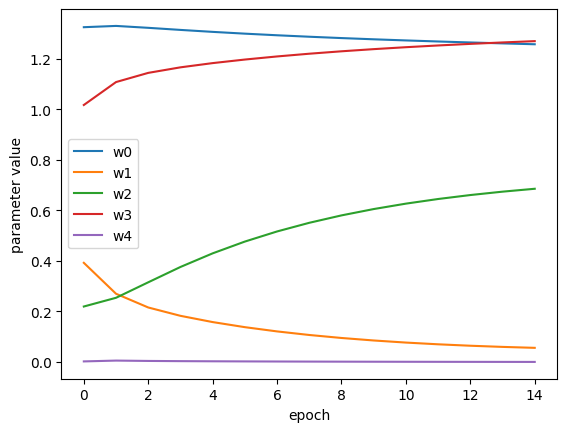

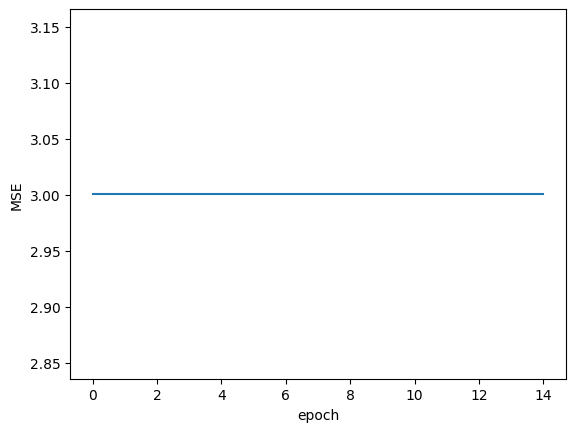

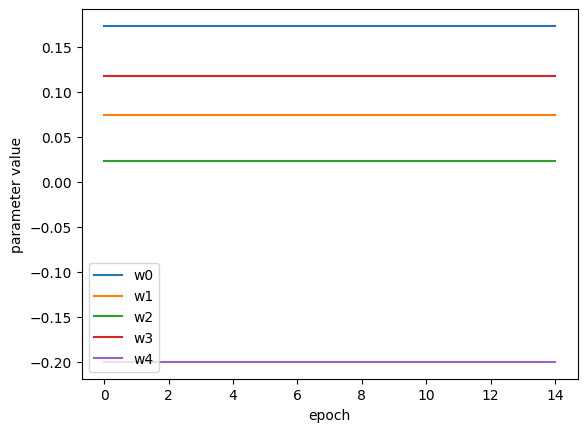

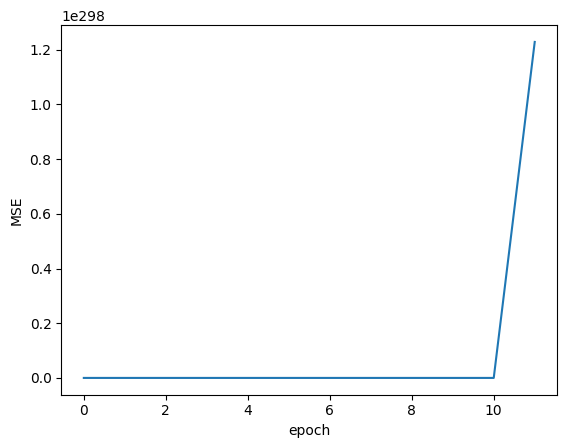

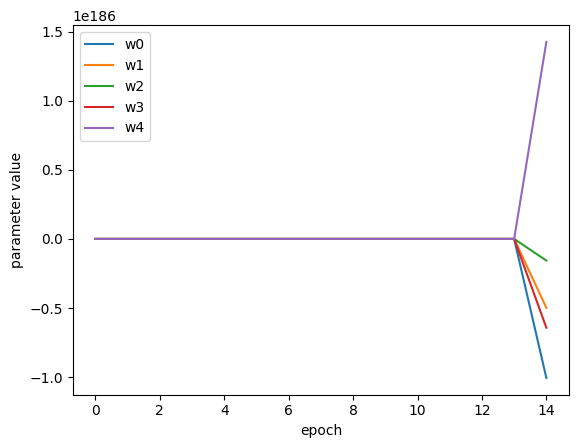

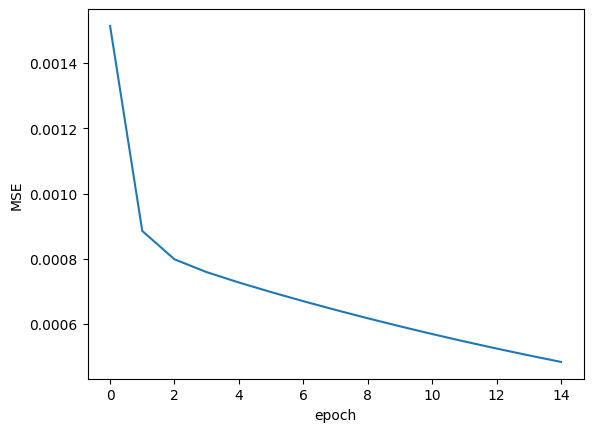

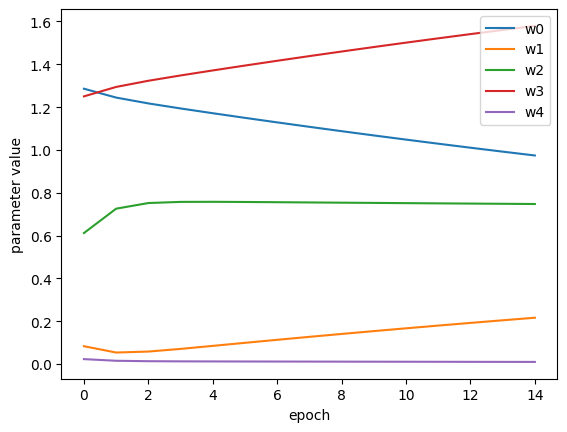

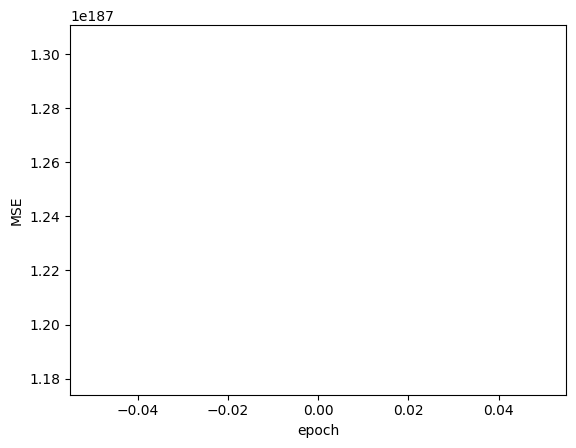

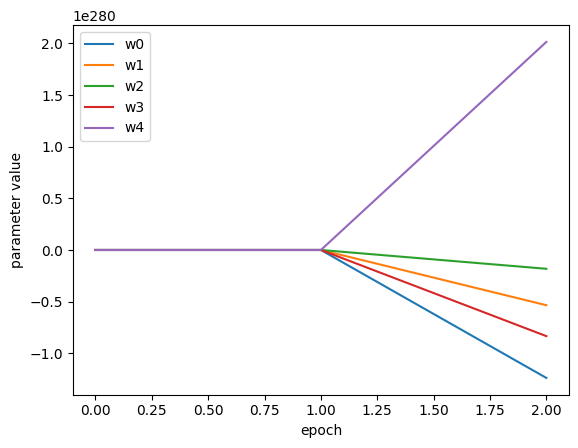

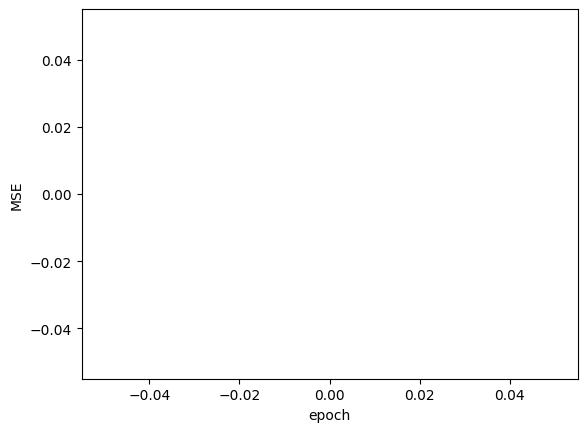

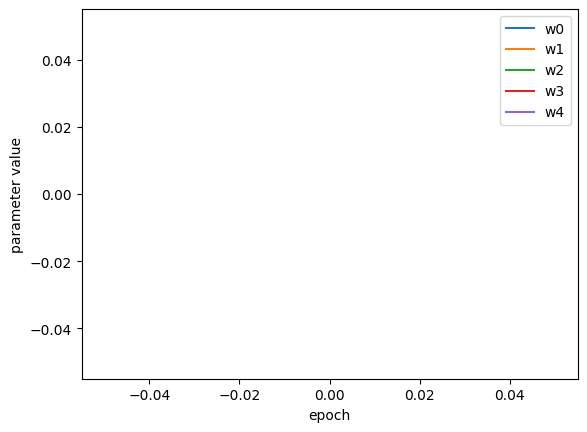

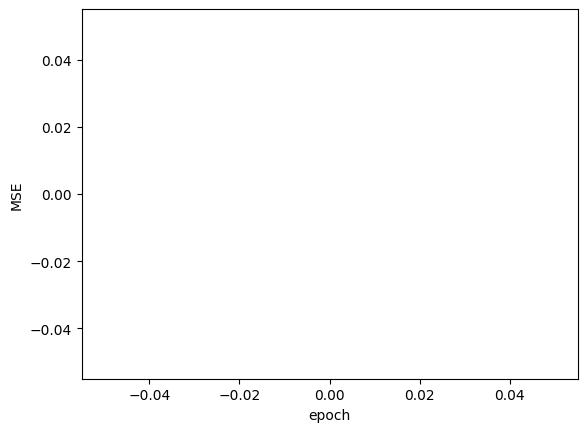

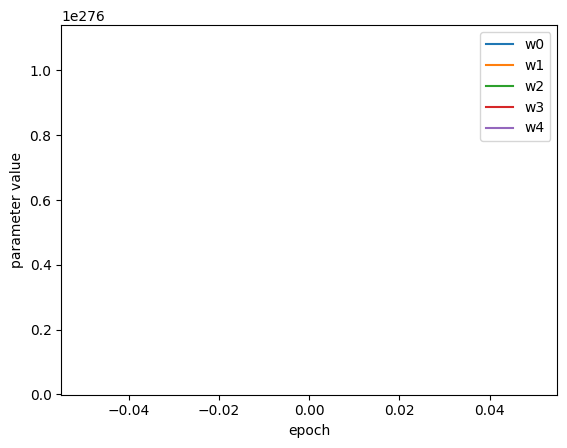

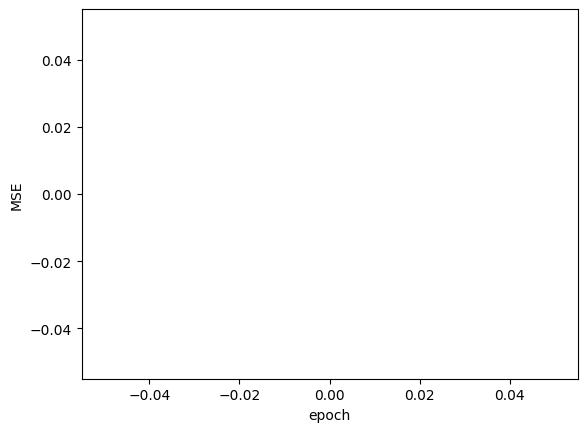

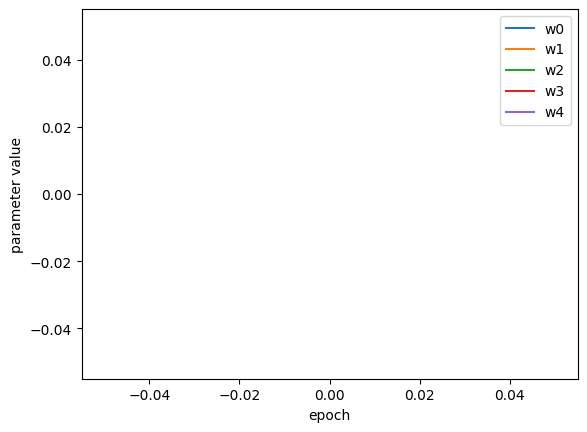

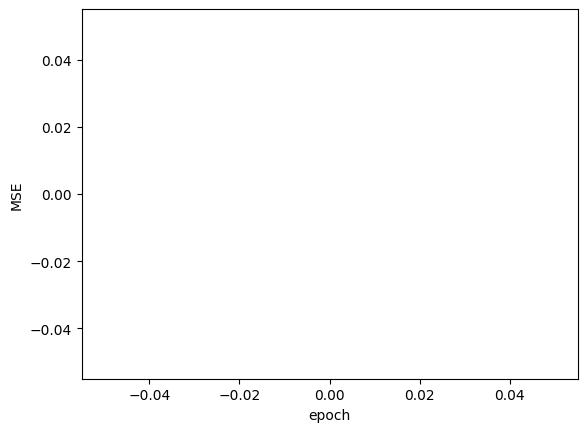

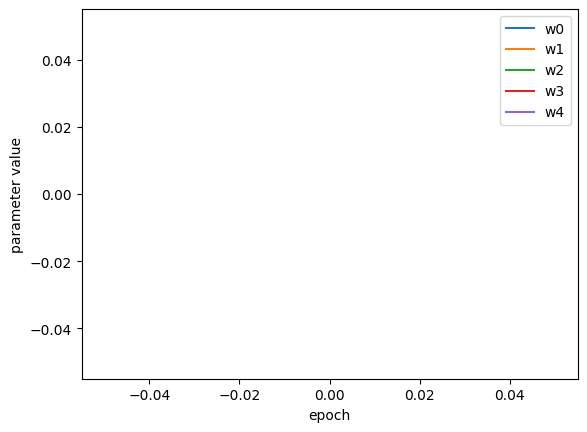

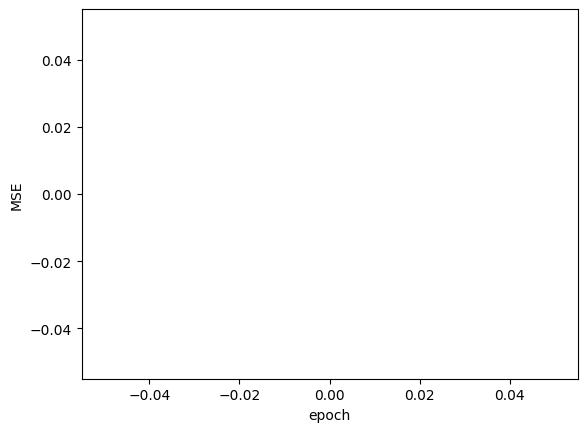

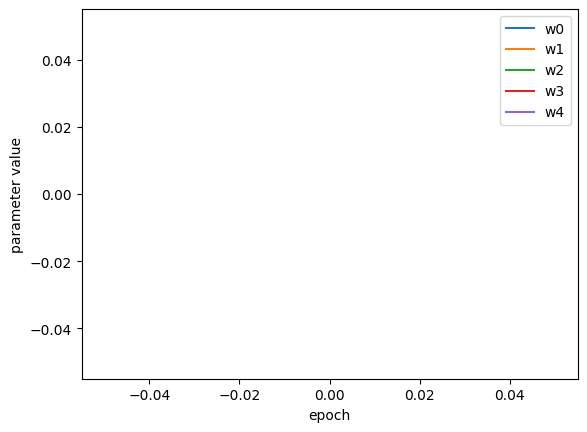

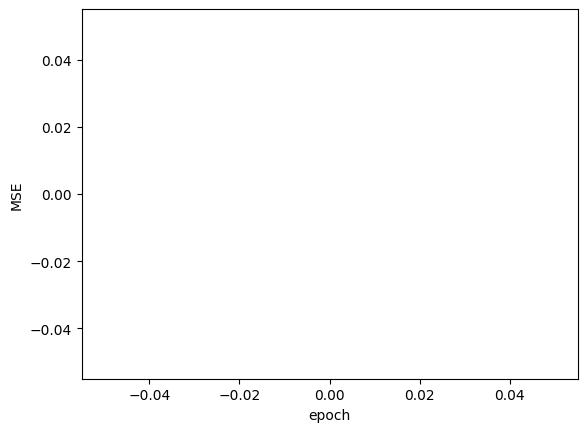

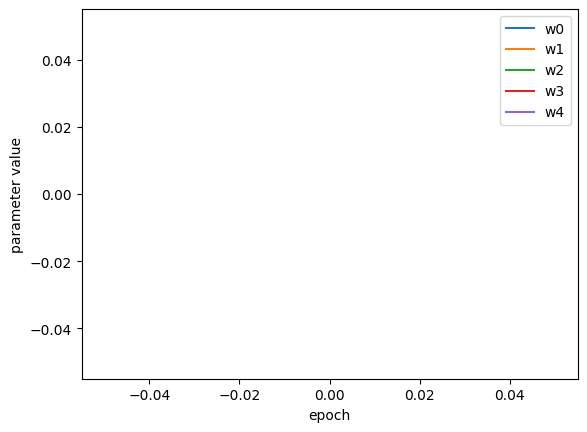

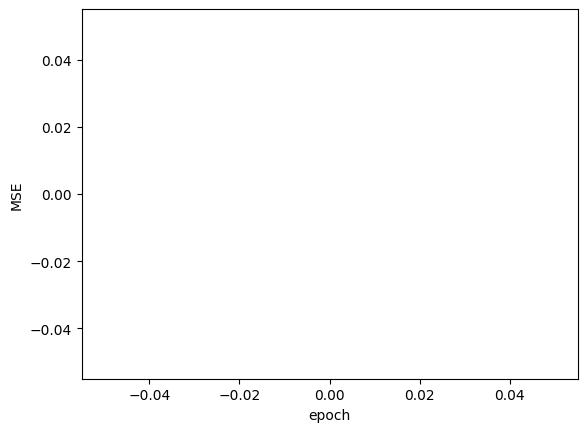

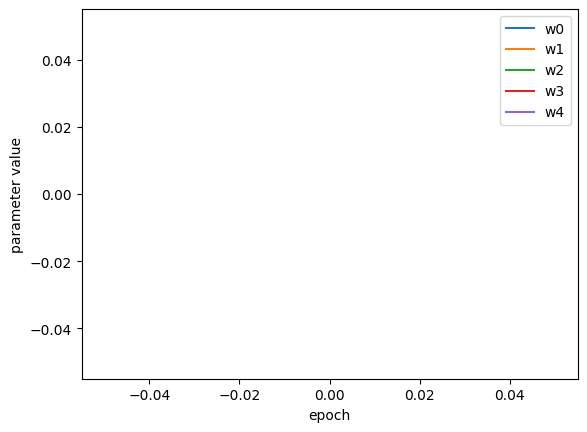

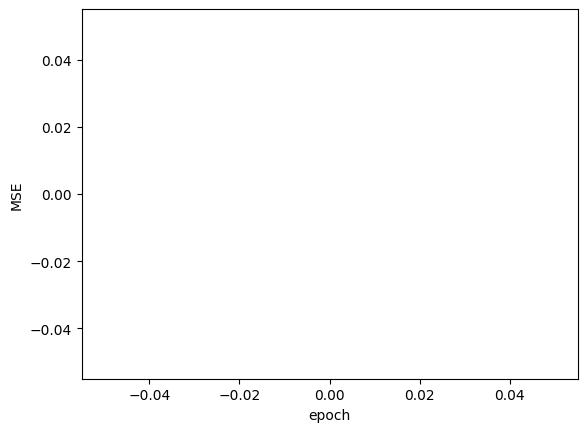

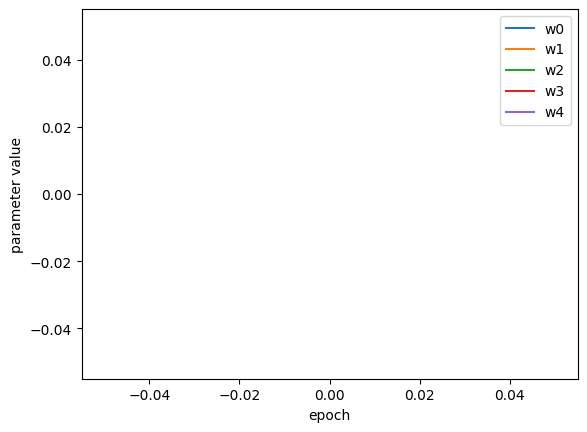

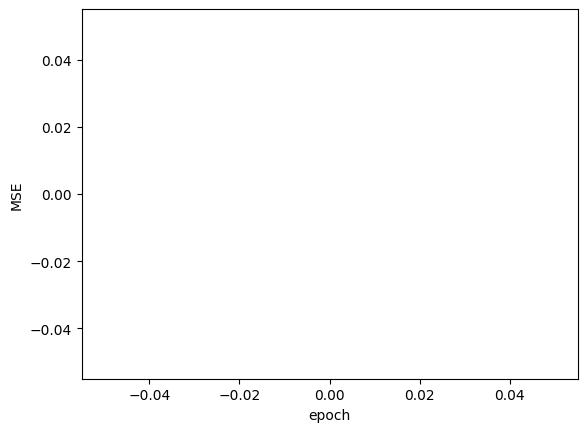

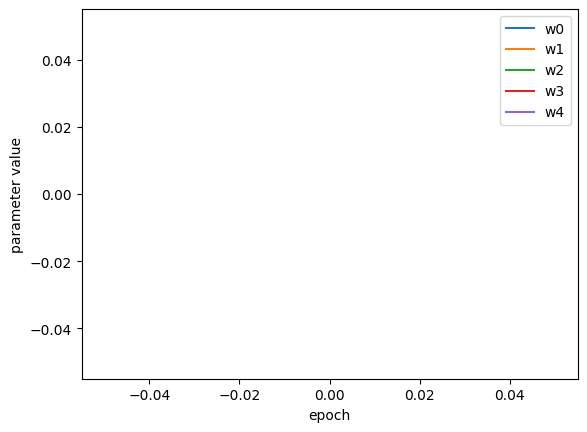

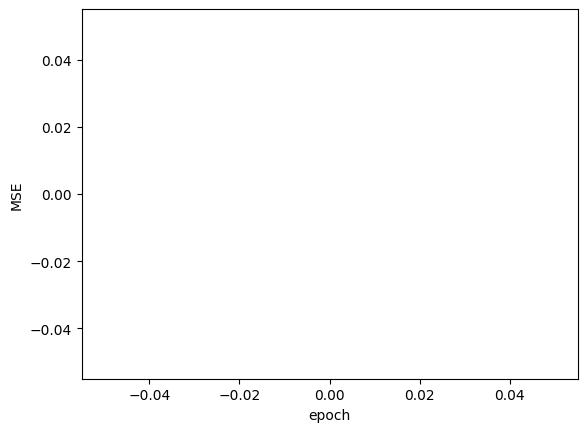

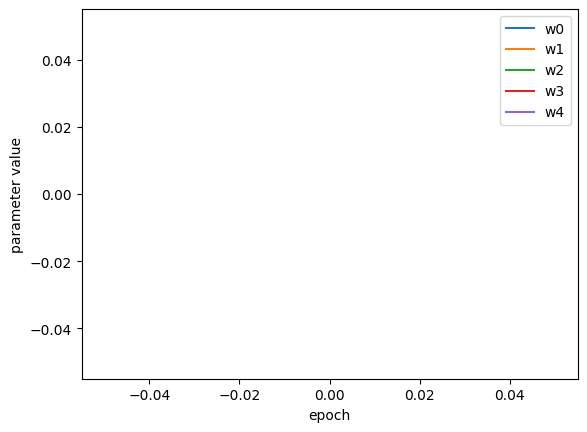

In [5]:
for i in range(len(learning_rate)):
    for j in range(len(regularization)):
        model = Regression(learning_rate[i], regularization[j], n_epochs)
        model.fit(X, y, plot=True)
        print('Learning rate: ', learning_rate[i], 'Regularization: ', regularization[j], 'MSE: ', model.lowest_mse)

# Q2. Neural Network Basics (10 points)

1.1 Can a multi-layered neural network with only linear activation functions in all hidden layers be represented as a neural network without any hidden layer? Explain your answer. (5 points)

1.2 Suppose you are solving a problem for image datasets using neural networks. You are wondering if you should use neural network with fully-connected layers or a convolutional neural network. Which one do you think is better suited for this task and why? (Read up on convolutional neural networks if we have not covered this in class by due date). (5 points)



Solution

1.1 Yes since a multilayered neural network with only linear activation functions can be modeled as one large polynomial function that captures all of the behavior of the hidden layers, since the function of linear functions is also a linear function. This means we could just have a output layer that takes the input layer and applies a linear activation function that has the characteristics the larger hidden network model.

1.2 CNNs will be better for this task since they extract more meaningful information from images by using a variety of filters per layer that convolve with our images. These filters can capture many important qualities about an image such as edges and corners of an object in the first few layers, and deeper into the network it can start to have filters that emulate the appearance of the object (like having a filter that's shaped like an animal, or a filter that captures the structure of a certain type of vehicle). Filters are much more oriented towards image tasks as they can capture the spatial relationships between pixels easier with filters than just having fully connected layers that may or may not capture the important underlying features of an image by optimizing a network of fully connected layers. 

# Q3. MLP Regression with Pytorch (30 points)
Pytorch provides extensive built-in functions useful for developing and training neural networks. In this exercise, we will try to build a Multi-layer Perceptron for a regression problem.


In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

2.1 Dataset : Download the diabetes dataset from sklearn.datasets. Divide this dataset into train and test sets with 75% of data in train and 25% in test with random_seed = 42. To use this dataset with Pytorch we need to convert it to a pytorch compatible dataset, which is an object of the torch.utils.Dataset class. Use the class below to convert this diabetes dataset to a torch.utils.Dataset object. (5 points)

In [4]:
class DatasetCustom(torch.utils.data.Dataset):
  def __init__(self, X, y):
      self.X = torch.from_numpy(X)
      self.y = torch.from_numpy(y)

  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]

In [9]:
# load diabetes dataset
X, y = load_diabetes(return_X_y=True)
# split diabetes data into train and test sets with 75% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# convert dataset into torch.utils.Dataset
train_dataset = DatasetCustom(X_train, y_train)
test_dataset = DatasetCustom(X_test, y_test)

2.2 Pytorch uses DataLoader class to load and iterate over a dataset for learning. Create a DataLoader object from the pytorch compatible dataset generated above with batchsize = 64 and shuffle = True. You can read more about Pytorch's Dataset and DataLoader [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html). (5 points)

In [10]:
# create dataloader for train and test sets
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

2.3 Network Design : Create a python class for a neural network with the following architecture:

   a) MLP : Linear layer (input_dim=10, output_dim = 4) followed by a ReLu layer and another linear layer (input_dim=4, output_dim = 1).

Pytorch [layers](https://pytorch.org/docs/stable/nn.html) are described here. The individual layers are stacked inside [Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential). 

Each class implements an init() method that defines the network and a forward method that performs the operations defined under the network. See the example below for a 3-layer neural network. (5 points)


In [7]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(10, 4),
            nn.ReLU(),
            nn.Linear(4, 1)
        )

    def forward(self, x):
        return self.layers(x)
        

In [ ]:
class Example(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(784, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    return self.layers(x)

2.4 Training : Train the above defined neural network using SGD optimizer with learning rate = 0.0001 for 50 epochs while minimizing for the MSELoss. (10 points) 

In [17]:
# Initialize the network
net = MLP()

loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)

def train(train_loader):
  avg_loss = []
  for epoch in range(0, 500): 
      print(f'Epoch {epoch+1}')
      loss = 0.0
      losses = []
      optimizer.zero_grad() # zero the parameter gradients
      # Iterate over the DataLoader for training data
      for i, data in enumerate(train_loader):

        inputs, targets = data
        inputs = inputs.float()
        targets = targets.float()
        # predict for inputs using net
        outputs = net(inputs)
        # compute loss for predictions wrt targets
        loss = loss_function(outputs, targets)
        # Call backward on loss
        loss.backward() # backward pass: compute gradients
        # take one step of optimization
        optimizer.step() # update weights
        losses.append(loss.item())

      print(f'Loss: {np.mean(losses):.4f}')
      avg_loss.append(np.mean(losses))

  return avg_loss


loss_64 = train(train_loader)

Epoch 1
Loss: 156.4324
Epoch 2
Loss: 152.5270
Epoch 3
Loss: 160.9689
Epoch 4
Loss: 157.6413
Epoch 5
Loss: 151.2270
Epoch 6
Loss: 154.1475
Epoch 7
Loss: 156.1652
Epoch 8
Loss: 156.0494
Epoch 9
Loss: 156.8498
Epoch 10
Loss: 157.5501
Epoch 11
Loss: 160.3831
Epoch 12
Loss: 155.2613
Epoch 13
Loss: 153.5901
Epoch 14
Loss: 156.4602
Epoch 15
Loss: 155.6424
Epoch 16
Loss: 153.0296
Epoch 17
Loss: 151.8350
Epoch 18
Loss: 155.5593
Epoch 19
Loss: 154.8911
Epoch 20
Loss: 156.3442
Epoch 21
Loss: 157.3202
Epoch 22
Loss: 151.8093
Epoch 23
Loss: 154.2281
Epoch 24
Loss: 153.6231
Epoch 25
Loss: 150.2329
Epoch 26
Loss: 152.5135
Epoch 27
Loss: 150.6542
Epoch 28
Loss: 152.7092
Epoch 29
Loss: 154.1621
Epoch 30
Loss: 158.3127
Epoch 31
Loss: 149.2132
Epoch 32
Loss: 152.8367
Epoch 33
Loss: 159.0949
Epoch 34
Loss: 153.3833
Epoch 35
Loss: 150.6458
Epoch 36
Loss: 151.9353
Epoch 37
Loss: 160.8659
Epoch 38
Loss: 151.8794
Epoch 39
Loss: 153.3455
Epoch 40
Loss: 153.1166
Epoch 41
Loss: 155.1093
Epoch 42
Loss: 154.7672
E

2.4 Plot the epoch loss (average of losses in all batches in one epoch) vs epoch when you set batch size = 64. In another figure, plot for epoch loss when you set batch size = 1. What do you observe? (5 points)

Epoch 1
Loss: 141.2168
Epoch 2
Loss: 74.2003
Epoch 3
Loss: 65.2260
Epoch 4
Loss: 63.7069
Epoch 5


c:\Users\laith\anaconda3\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Loss: 62.8076
Epoch 6
Loss: 66.4747
Epoch 7
Loss: 62.1860
Epoch 8
Loss: 57.6247
Epoch 9
Loss: 53.4494
Epoch 10
Loss: 57.4665
Epoch 11
Loss: 51.4920
Epoch 12
Loss: 49.9641
Epoch 13
Loss: 49.5893
Epoch 14
Loss: 48.6483
Epoch 15
Loss: 48.4361
Epoch 16
Loss: 45.9498
Epoch 17
Loss: 46.6562
Epoch 18
Loss: 46.6693
Epoch 19
Loss: 48.4014
Epoch 20
Loss: 48.3419
Epoch 21
Loss: 46.7364
Epoch 22
Loss: 45.6634
Epoch 23
Loss: 47.1397
Epoch 24
Loss: 45.9713
Epoch 25
Loss: 45.1691
Epoch 26
Loss: 48.5878
Epoch 27
Loss: 62.4073
Epoch 28
Loss: 50.6408
Epoch 29
Loss: 48.2976
Epoch 30
Loss: 63.4117
Epoch 31
Loss: 53.4298
Epoch 32
Loss: 55.6582
Epoch 33
Loss: 66.4833
Epoch 34
Loss: 80.8121
Epoch 35
Loss: 48.4183
Epoch 36
Loss: 46.2248
Epoch 37
Loss: 46.8702
Epoch 38
Loss: 52.7724
Epoch 39
Loss: 48.2038
Epoch 40
Loss: 51.3876
Epoch 41
Loss: 54.1462
Epoch 42
Loss: 61.4315
Epoch 43
Loss: 55.6698
Epoch 44
Loss: 47.1964
Epoch 45
Loss: 47.0400
Epoch 46
Loss: 45.3959
Epoch 47
Loss: 45.1781
Epoch 48
Loss: 52.1788
E

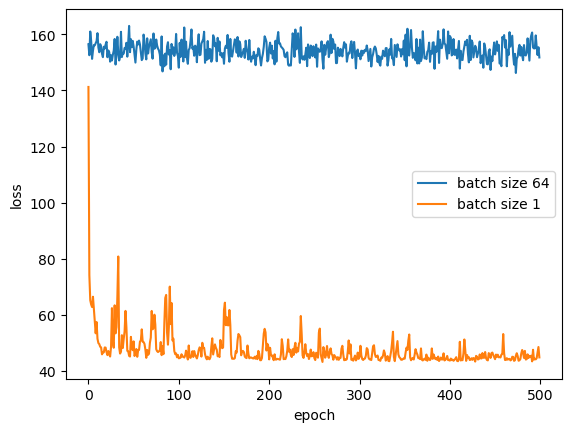

In [18]:
import matplotlib.pyplot as plt

# now set batch size to 1 and train
batch_size = 1
train_loader_1 = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader_1 = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
loss_1 = train(train_loader_1)

# plot the loss vs epoch for both batch sizes
plt.figure()
plt.plot(range(500), loss_64, label='batch size 64')
plt.plot(range(500), loss_1, label='batch size 1')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# Observation
The above graph shows that the smaller batch size has signifcantly less loss, however this comes at the expense of taking much longer to train. This makes sense since we are using much more data to optimize our parameters, and as such we are getting a more robust and accurate represenation of the underlying distribution of data that allows us to perform much better when making inference on the test set. 

#Question 4: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons, .

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 